# Video game sales analysis for Ice online store

This analysis it's going to be developed for an online store that wants to focus it's decisions for the next year based on behavioral patterns from data collected for the 2016.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind


In [51]:
df = pd.read_csv("../games.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Changing to lower case all column names

In [52]:
df.columns = [col.lower() for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [53]:
df.head(10)
df.tail(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [54]:
# Changing year_of_release column data type from float to int

df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Filtering 2016 records and get dimension of the Data frame and keep a whole data frame as df_whole

In [55]:
df_whole = df

df.shape

(16715, 11)

Checking and counting missing values

In [56]:
# Total of missing values in each column
missing_values = df_whole.isnull().sum()
print(missing_values)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [57]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Filling missing values with mean score of the serie

In [58]:
# Converting user_score column to numeric 
df_whole['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

def fill_missed_val_mean(serie):
    mean_val = serie.mean()
    return serie.fillna(mean_val)

df_whole['user_score'] = df.groupby('genre')['user_score'].transform(fill_missed_val_mean)
df_whole['user_score'].fillna(0, inplace=True)


missing_val = df.isnull().sum()
print(missing_val)
void = df_whole[df_whole['user_score'].isnull()]
print(void)
df_whole.head(10)


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


/var/folders/1l/nbw_db6x2rd8s9znb0vfd7qw0000gn/T/ipykernel_3052/3197706140.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_whole['user_score'].fillna(0, inplace=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.301402,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.619515,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,7.175000,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.500000,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.400000,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,7.041883,NaN


Filling missing values with mean for critic score

In [59]:
# Fill missing values in 'critic_score' with mean

# Converting user_score column to numeric 
df_whole['critic_score'] = pd.to_numeric(df_whole['critic_score'], errors='coerce')

def fill_missed_val_mean(serie):
    mean_val = serie.mean()
    return serie.fillna(mean_val)

df_whole['critic_score'] = df_whole.groupby('genre')['critic_score'].transform(fill_missed_val_mean)
df_whole['critic_score'].fillna(0, inplace=True)


missing_val = df.isnull().sum()
print(missing_val)
df_whole.head(10)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64


/var/folders/1l/nbw_db6x2rd8s9znb0vfd7qw0000gn/T/ipykernel_3052/1448810023.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_whole['critic_score'].fillna(0, inplace=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.424107,7.175000,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.181144,7.041883,NaN


In [60]:
# Check the data types of the 'rating' column
df_whole.info()
print(df_whole['rating'].dtype)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
object


In [61]:
rating_col = df['rating']
print(rating_col)

0          E
1        NaN
2          E
3          E
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: rating, Length: 16715, dtype: object


In [62]:
df_whole.shape

(16715, 11)

In [63]:
df_whole.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.424107,7.175000,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.181144,7.041883,NaN


In [64]:
# Round 'critic_score' and 'user_score' to two decimals
df_whole['critic_score'] = df_whole['critic_score'].round(2)
df_whole['user_score'] = df_whole['user_score'].round(2)

Calculating the total sales in all regions for each game

In [65]:
df_whole['total_sales'] = df_whole[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df_whole.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.06,7.30,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.65,7.62,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.42,7.18,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.18,7.04,NaN,28.31


Counting How many games were released in different years.

In [66]:
# Count the number of games released in each year
games_per_year = df_whole['year_of_release'].value_counts()

# Sort the values by year
games_per_year = games_per_year.sort_index()

# Print the result
print(games_per_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64


As we can see in the result, as the years pass by more games are released

In [67]:
# Calculate total sales for each platform
platform_sales = df_whole.groupby('platform')['total_sales'].sum()

# Identify platforms with the greatest total sales
top_platforms = platform_sales.nlargest(5)  # Assuming you want the top 5 platforms
print("Platforms with the greatest total sales:")
print(top_platforms)


# Build a distribution based on data for each year for these platforms
platforms_data = df_whole[df_whole['platform'].isin(top_platforms.index)]
platforms_sales_per_year = platforms_data.groupby(['platform', 'year_of_release'])['total_sales'].sum()

# Create a DataFrame with platform names and total sales
platform_sales_df = pd.DataFrame({'platform': platform_sales.index, 'total_sales': platform_sales.values})

# Merge with another DataFrame containing the year of release for each platform
platform_sales_df = platform_sales_df.merge(df_whole[['platform', 'year_of_release']], on='platform', how='left')

# Display the DataFrame
print(platform_sales_df)

# Get the list of unique platforms in platform_sales_df
platforms_in_sales_df = platform_sales_df['platform'].unique()

# Get the list of unique platforms in the original dataset
all_platforms = df_whole['platform'].unique()

# Filter the original dataset to include only platforms before 2000
platforms_before_2000 = df_whole[df_whole['year_of_release'] < 2000]['platform'].unique()

# Filter the original dataset to include only platforms after 2000
platforms_after_2000 = df_whole[df_whole['year_of_release'] >= 2000]['platform'].unique()

# Find platforms that are present before 2000 but not after 2000
platforms_not_after_2000 = [platform for platform in platforms_before_2000 if platform not in platforms_after_2000]

# Display the platforms that were present before 2000 but not after 2000
print("Platforms that were present before 2000 but not after 2000:")
print(platforms_not_after_2000)




# Determine how long it generally takes for new platforms to appear and old ones to fade
earliest_year = df_whole['year_of_release'].min()
latest_year = df_whole['year_of_release'].max()
platform_lifetimes = df_whole.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetimes['lifespan'] = platform_lifetimes['max'] - platform_lifetimes['min']
average_lifetime = platform_lifetimes['lifespan'].mean()
print("\nAverage lifetime of a platform:", average_lifetime, "years")





Platforms with the greatest total sales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64
      platform  total_sales  year_of_release
0         2600        96.98             1982
1         2600        96.98             1981
2         2600        96.98             1980
3         2600        96.98             1980
4         2600        96.98             <NA>
...        ...          ...              ...
16710     XOne       159.32             2016
16711     XOne       159.32             2016
16712     XOne       159.32             2016
16713     XOne       159.32             2016
16714     XOne       159.32             2016

[16715 rows x 3 columns]
Platforms that were present before 2000 but not after 2000:
['NES', 'SNES', '2600', 'GEN', 'SAT', 'SCD', 'NG', 'TG16', '3DO', 'GG', 'PCFX']

Average lifetime of a platform: 7.612903225806452 years


In [68]:
df = df[df_whole['year_of_release']== 2016]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 94 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             502 non-null    object 
 1   platform         502 non-null    object 
 2   year_of_release  502 non-null    Int64  
 3   genre            502 non-null    object 
 4   na_sales         502 non-null    float64
 5   eu_sales         502 non-null    float64
 6   jp_sales         502 non-null    float64
 7   other_sales      502 non-null    float64
 8   critic_score     502 non-null    float64
 9   user_score       502 non-null    float64
 10  rating           280 non-null    object 
 11  total_sales      502 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 51.5+ KB


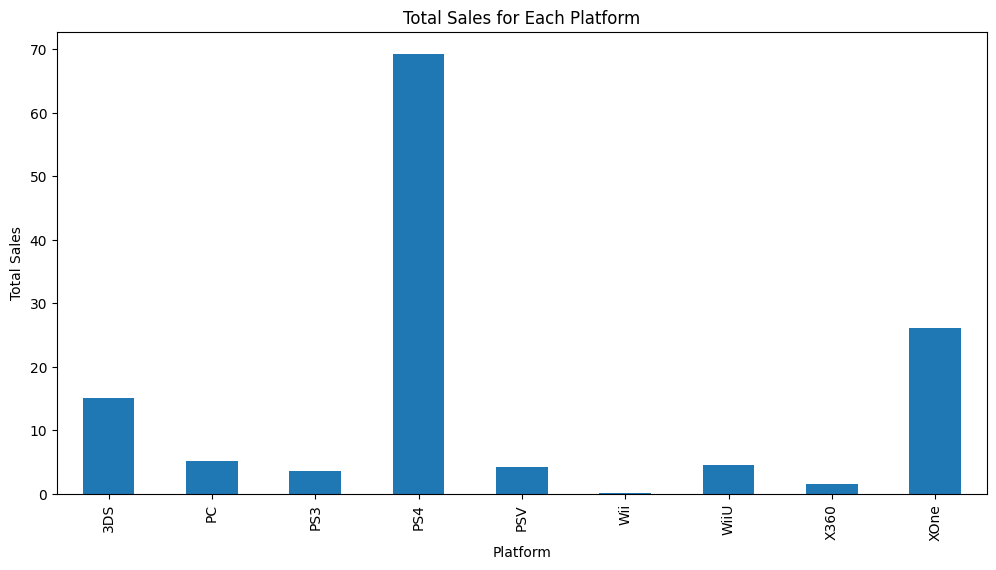

Potentially profitable platforms: ['PS4', 'XOne', '3DS', 'PC', 'WiiU']


In [69]:
# Calculate the total sales for each platform
platform_sales = df.groupby('platform')['total_sales'].sum()

# Identify the platforms with the highest total sales
top_platforms = platform_sales.nlargest(5)  # Select top 5 platforms

# Plot the total sales for each platform
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar')
plt.title('Total Sales for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()


# Most profitable platforms based on the analysis
potentially_profitable_platforms = platform_sales.nlargest(5).index.tolist()
print("Potentially profitable platforms:", potentially_profitable_platforms)



As we can see in the plot, the most profitable platforms are:<br><br>
1- PS4 <br><br>
2- XOne <br><br>
3- 3DS <br><br>
4- PC <br><br>
5- WiiU 

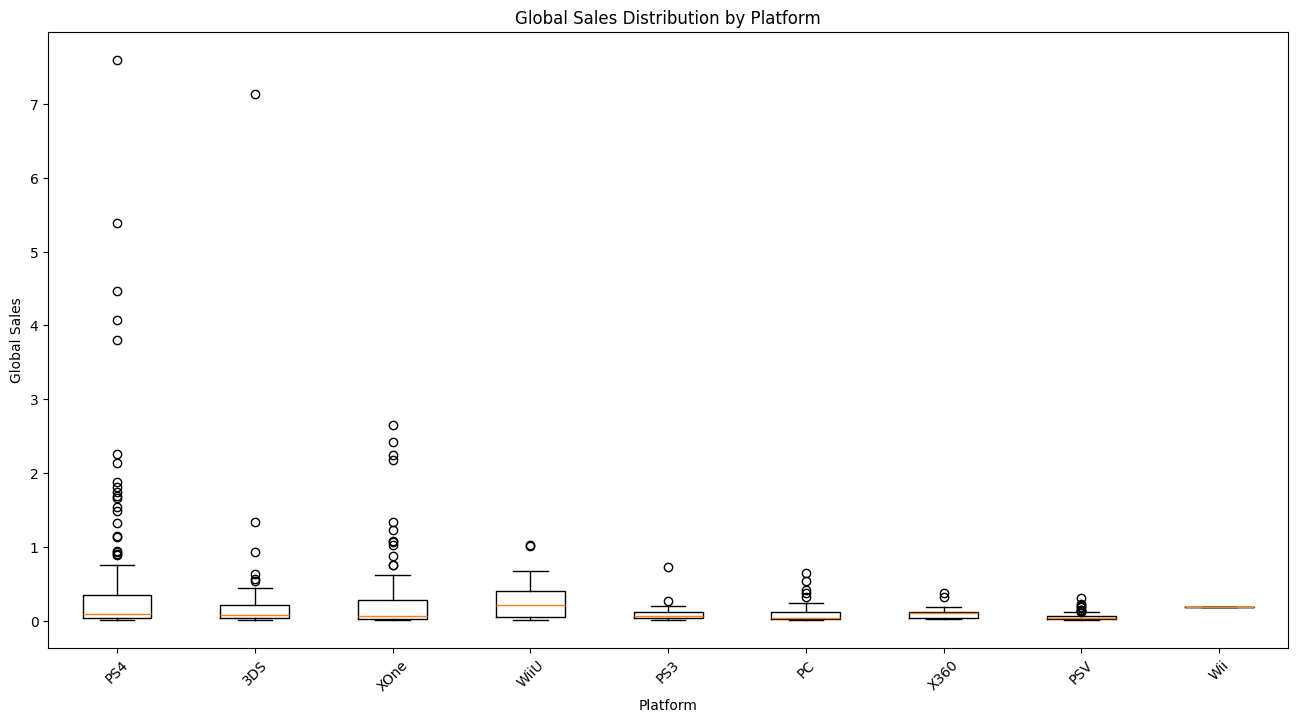

Average Sales by Platform:
platform
PS4     0.422256
3DS     0.329130
WiiU    0.328571
XOne    0.300575
Wii     0.180000
X360    0.116923
PC      0.097222
PS3     0.094737
PSV     0.050000
Name: total_sales, dtype: float64


In [70]:
# Build a box plot for global sales broken down by platform
plt.figure(figsize=(16, 8))
plt.boxplot([df[df['platform'] == platform]['total_sales'] for platform in df['platform'].unique()],
            labels=df['platform'].unique())
plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()
average_sales = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Average Sales by Platform:")
print(average_sales)

Based on the average sales by platform, we can observe the following:

PS4 has the highest average sales among the platforms listed, with an average of approximately 0.42 million units sold.<br/><br/>
3DS and Wii U follow closely behind, with average sales of approximately 0.33 million units each.<br/><br/>
Xbox One (XOne) is slightly lower, with an average of approximately 0.30 million units.
Wii has an average of 0.18 million units, indicating lower sales compared to the newer platforms.<br/><br/>
Xbox 360 (X360) and PS3 have lower averages, around 0.12 million and 0.09 million units respectively, which is expected as they are older platforms.<br/><br/>
PC and PS Vita (PSV) have the lowest average sales among the listed platforms, with around 0.097 million and 0.05 million units respectively.<br/><br/>

##

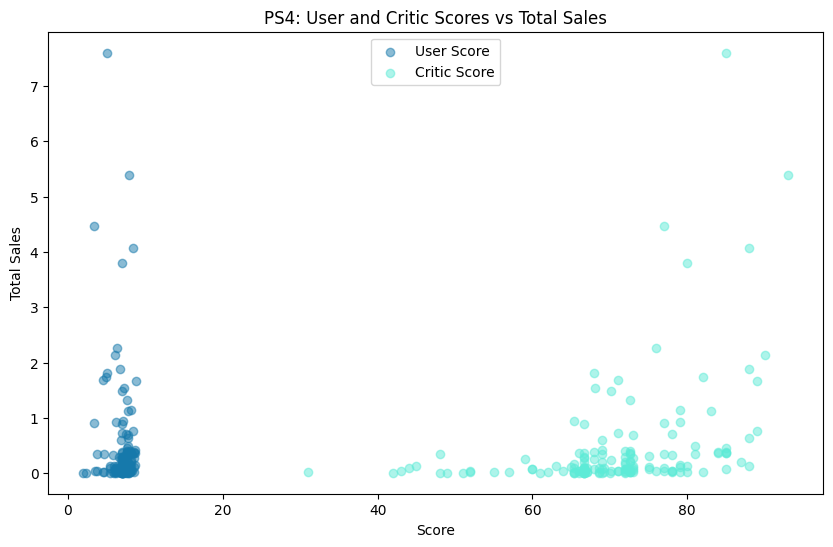

Correlation between User Score and Total Sales: -0.13084990133783347
Correlation between Critic Score and Total Sales: 0.39123134497719964


In [71]:
# Filter the data for the PS4 platform
ps4_data = df[df['platform'] == 'PS4']

# Create a scatter plot for user score vs total sales
plt.figure(figsize=(10, 6))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5, label='User Score', color="#1679AB" )
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.5, label='Critic Score', color='#5DEBD7')
plt.title('PS4: User and Critic Scores vs Total Sales')
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Calculate the correlation between user score and total sales
user_sales_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print("Correlation between User Score and Total Sales:", user_sales_corr)

# Calculate the correlation between critic score and total sales
critic_sales_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print("Correlation between Critic Score and Total Sales:", critic_sales_corr)


The correlation between user score and total sales is approximately -0.13, indicating a weak negative correlation. This suggests that there is a slight tendency for higher user scores to be associated with lower total sales, but the relationship is not strong, while the correlation between critic score and total sales is approximately 0.39, indicating a moderate positive correlation. This suggests that there is a tendency for higher critic scores to be associated with higher total sales, but again, the relationship is not extremely strong.

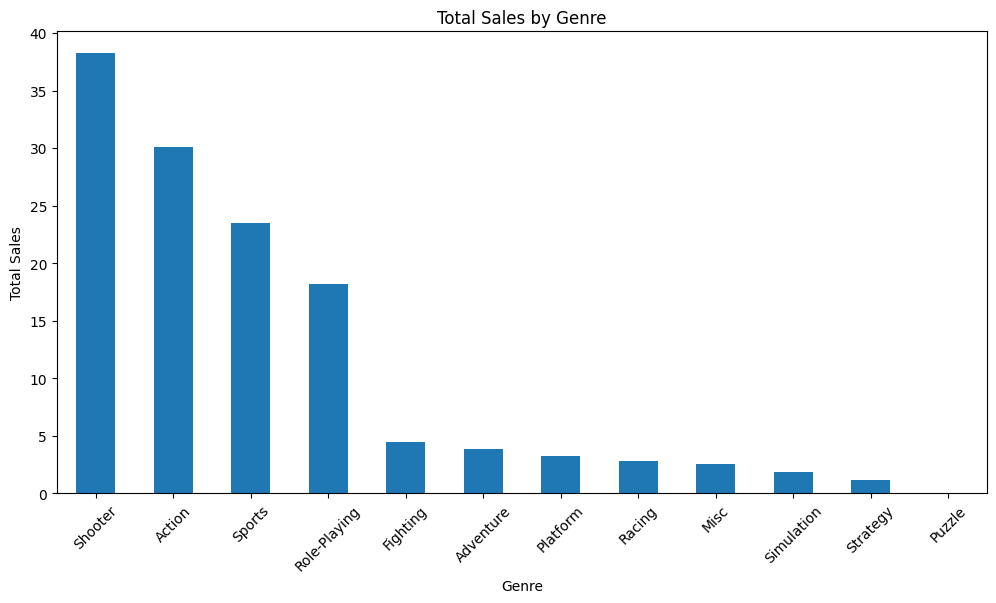

Most profitable genres:
genre
Shooter    38.22
Action     30.11
Sports     23.49
Name: total_sales, dtype: float64

Genres with high sales:
genre
Shooter         38.22
Action          30.11
Sports          23.49
Role-Playing    18.18
Name: total_sales, dtype: float64

Genres with low sales:
genre
Fighting      4.47
Adventure     3.82
Platform      3.23
Racing        2.79
Misc          2.60
Simulation    1.89
Strategy      1.13
Puzzle        0.01
Name: total_sales, dtype: float64


In [72]:
# Calculate total sales for each genre
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plotting the distribution of games by genre
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Observations
print("Most profitable genres:")
print(genre_sales.head(3))  # Display top 3 genres with highest total sales
print("\nGenres with high sales:")
print(genre_sales[genre_sales > genre_sales.mean()])  # Display genres with sales above average
print("\nGenres with low sales:")
print(genre_sales[genre_sales < genre_sales.mean()]) 


These observations suggest that genres like Shooter, Action, and Sports tend to be the most profitable and have high sales, while genres like Puzzle, Strategy, and Simulation have lower sales. This information can be valuable for the organization of the advertizing campaign foreseen.

Analysis of top 5 platforms per region.

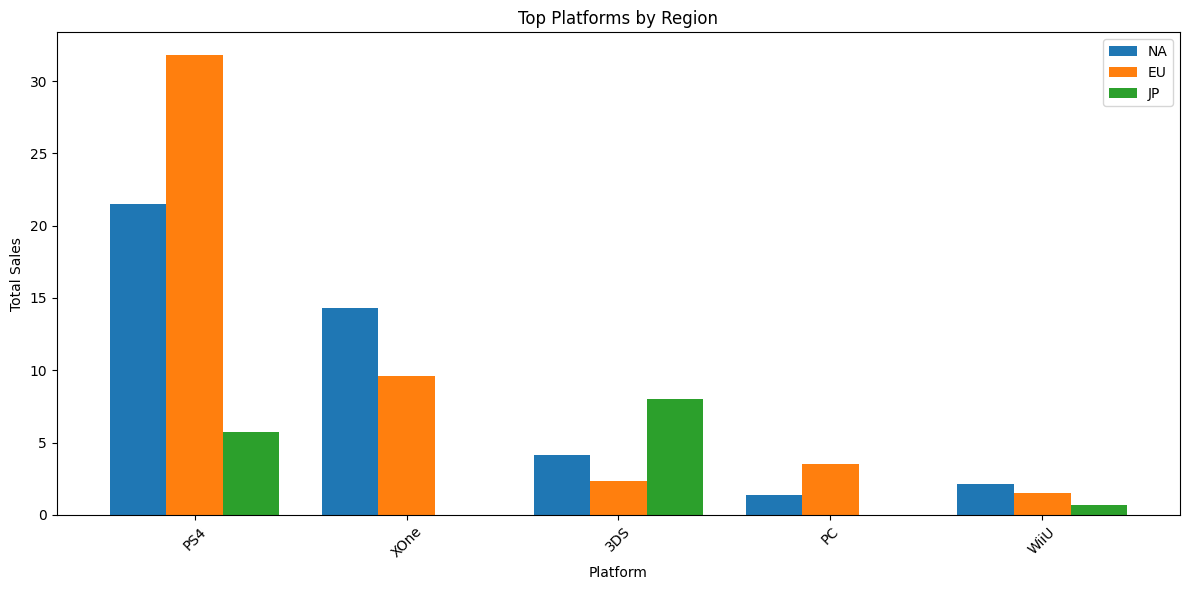

In [73]:

# Top 5 platforms by region
top_platforms = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_platforms['total_sales'] = top_platforms.sum(axis=1)
top_platforms = top_platforms.sort_values('total_sales', ascending=False).head(5)

# Plotting the top platforms by region
ax = top_platforms[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(12, 6), width=0.8)

# Customizing the plot
plt.title('Top Platforms by Region')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(['NA', 'EU', 'JP'])

plt.tight_layout()
plt.show()


Analysis of top 5 genres per region

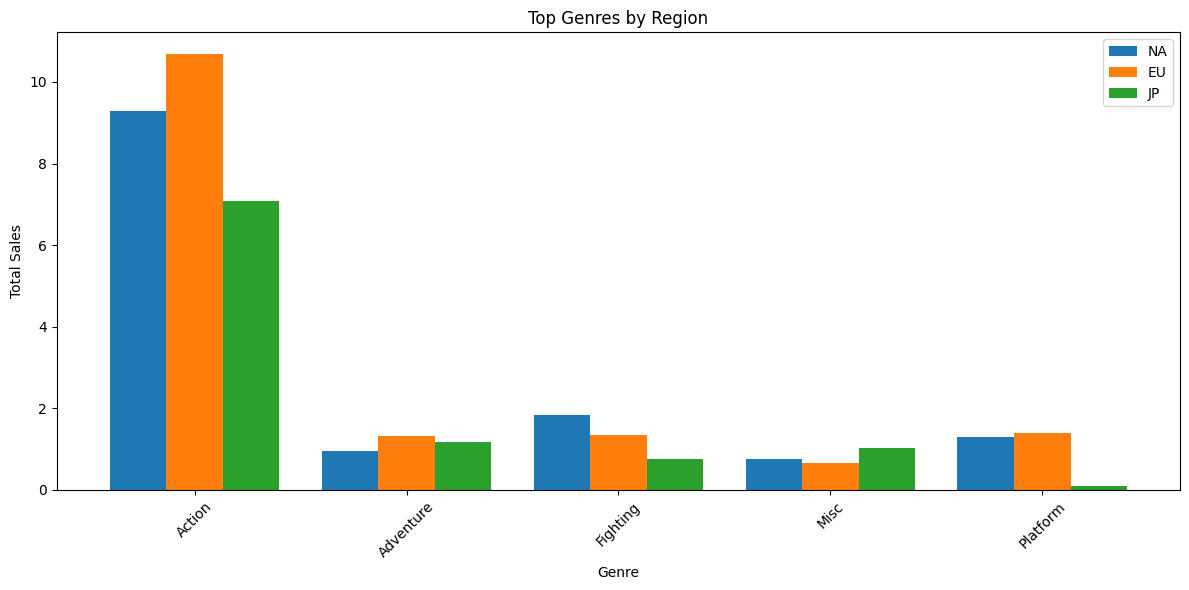

In [74]:
# Top 5 genres by region
top_genres = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_genres['total_sales'] = top_platforms.sum(axis=1)
top_genres = top_genres.sort_values('total_sales', ascending=False).head(5)

# Plotting the top platforms by region
ax = top_genres[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(12, 6), width=0.8)

# Customizing the plot
plt.title('Top Genres by Region')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(['NA', 'EU', 'JP'])

plt.tight_layout()
plt.show()

As we can see in the plot there are differences between the regions, the mos popular genres in a region might not be the most popular in the following region.

## Top 5 ESRB ratings by region



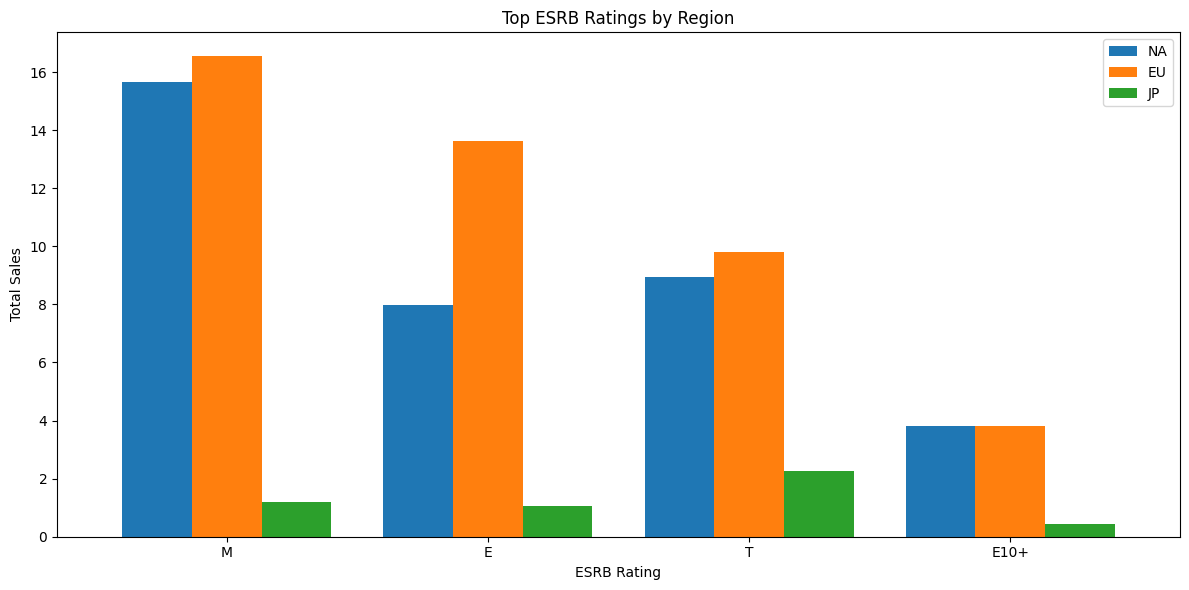

In [75]:
# Top 5 ESRB ratings by region
top_ratings = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_ratings['total_sales'] = top_ratings.sum(axis=1)
top_ratings = top_ratings.sort_values('total_sales', ascending=False).head(5)

# Plotting the top ESRB ratings by region
ax = top_ratings[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(12, 6), width=0.8)

# Customizing the plot
plt.title('Top ESRB Ratings by Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(['NA', 'EU', 'JP'])

plt.tight_layout()
plt.show()


The ratings have different behaviors depending the region, and also affect particularly the kind of rating received.

## Average user ratings between Xbox One and PC platform

In [76]:
# Separate the data for Xbox One and PC
xbox_one_scores = df[df['platform'] == 'Xbox One']['user_score']
pc_scores = df[df['platform'] == 'PC']['user_score']

# Perform t-test
t_statistic, p_value = ttest_ind(xbox_one_scores, pc_scores, nan_policy='omit')

# Define significance level
alpha = 0.05

# Print results
if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings of Xbox One and PC are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings of Xbox One and PC are the same.")



Fail to reject the null hypothesis: Average user ratings of Xbox One and PC are the same.


The average user ratings of Xbox One and PC are not significantly different based on the t-test. The data does not provide strong support for the idea that the average ratings are different; they are similar.

## Testing average user ratings for Action and Sport Genres

In [77]:
action_scores = df[df['genre'] == 'Action']['user_score']
sports_scores = df[df['genre'] == 'Sports']['user_score']


t_statistic, p_value = ttest_ind(action_scores, sports_scores, nan_policy='omit')

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings for Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings for Action and Sports genres are the same.")


Reject the null hypothesis: Average user ratings for Action and Sports genres are different.


Results suggests that the average user ratings for Action and Sports genres are different. This implies that there is a statistically significant difference in the average user ratings between these two genres.

## How was formulated the null hypotheses
The average user ratings for Action and Sports genres are different. This suggests that there is a statistically significant difference in how these genres are perceived by users. Because of this the null hypotheses is rejected.

## What significance level was chosen and why.

I chose a significance level of 0.05, which is a common choice in hypothesis testing. This level means that if the p-value is less than 0.05, we reject the null hypothesis. The significance level of 0.05 corresponds to a 5% chance of incorrectly rejecting the null hypothesis when it is actually true. It's a balance between being stringent enough to avoid false positives and being lenient enough to detect real differences when they exist.

# General conclusions

Based on the analysis of the video game sales data, several key insights can be drawn:

1- Correlation between User Score and Total Sales: There is a weak negative correlation of approximately -0.13 between user scores and total sales. This suggests that higher user scores are slightly associated with lower total sales. However, the relationship is not strong.<br> <br>

2- Correlation between Critic Score and Total Sales: There is a moderate positive correlation of approximately 0.39 between critic scores and total sales. This indicates that higher critic scores are moderately associated with higher total sales, but the relationship is not extremely strong.<br><br>

3- Most Profitable Genres: The most profitable genres based on total sales are Shooter, Action, and Sports, with Shooter leading in sales.<br><br>

4- Genres with High and Low Sales: The genres with the highest sales are Shooter, Action, Sports, and Role-Playing, while the genres with the lowest sales are Puzzle, Strategy, Simulation, and Misc.<br><br>

5- Regional Differences in Genre Popularity: The popularity of genres varies between regions, with different genres being more popular in different regions. This suggests that regional preferences play a role in determining genre popularity.<br><br>

6- Regional Differences in Ratings: There are differences in ratings between regions, and these ratings can affect the popularity of genres in a particular region. This indicates that regional preferences not only influence genre popularity but also impact the kind of ratings received.<br><br>

7- Average User Ratings of Xbox One and PC: The t-test results indicate that the average user ratings of Xbox One and PC are not significantly different. This suggests that there is no strong evidence to suggest that the average ratings are different between these two platforms.<br><br>

8- Average User Ratings for Action and Sports Genres: The t-test results suggest that the average user ratings for Action and Sports genres are different. This implies that there is a statistically significant difference in the average user ratings between these two genres.<br><br>

Overall, the analysis provides insights into the factors influencing video game sales and highlights the importance of considering both user and critic ratings, as well as regional preferences, when analyzing video game sales data.<br><br>